# Decision Tree Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
#Loading up the coffee data set
coffee_df = pd.read_csv('../data/coffee.csv')

#Creating a copy
coffee = coffee_df.copy()

Creating a train test split.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
## Make the split, stratify according to country of origin.
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            test_size=.2,
                                            stratify=coffee['Country_of_Origin'])

In [5]:
coffee_train.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
196,Mexico,Semi-washed / Semi-pulped,7.83,7.92,7.67,7.83,7.50,7.75,10.0,10.0,10.0,7.75,1450.0,1450.0,1450.0
465,Brazil,Pulped natural / honey,7.58,7.58,7.58,7.50,7.67,7.58,10.0,10.0,10.0,7.58,905.0,905.0,905.0
64,Brazil,Semi-washed / Semi-pulped,8.00,8.00,8.00,7.67,7.75,8.00,10.0,10.0,10.0,8.00,1250.0,1250.0,1250.0
27,Brazil,Natural / Dry,8.50,8.17,8.00,7.75,8.00,8.00,10.0,10.0,10.0,8.00,1300.0,1300.0,1300.0
718,Mexico,Washed / Wet,7.58,7.58,7.42,7.42,7.42,7.42,10.0,10.0,10.0,7.42,1338.0,1338.0,1338.0


Creating a list of our predictor variables

In [6]:
predictors = ['Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup',
       'Sweetness', 'Cupper_Points']

coffee_train[predictors]

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points
196,7.83,7.92,7.67,7.83,7.50,7.75,10.0,10.0,10.0,7.75
465,7.58,7.58,7.58,7.50,7.67,7.58,10.0,10.0,10.0,7.58
64,8.00,8.00,8.00,7.67,7.75,8.00,10.0,10.0,10.0,8.00
27,8.50,8.17,8.00,7.75,8.00,8.00,10.0,10.0,10.0,8.00
718,7.58,7.58,7.42,7.42,7.42,7.42,10.0,10.0,10.0,7.42
...,...,...,...,...,...,...,...,...,...,...
836,7.33,7.42,7.33,7.67,7.42,7.25,10.0,10.0,10.0,7.33
877,7.08,7.33,7.58,7.58,7.17,7.50,10.0,10.0,10.0,7.33
431,7.67,7.67,7.50,7.67,7.50,7.67,10.0,10.0,10.0,7.50
845,7.58,7.50,7.25,7.25,7.50,7.25,10.0,10.0,10.0,7.33


In [7]:
coffee.Country_of_Origin.value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
Name: Country_of_Origin, dtype: int64

In [8]:
labels = coffee.Country_of_Origin.value_counts().index

## Creating the Model

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [10]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)

train_accs = np.zeros(5)
holdout_accs = np.zeros(5)

i = 0
for train_index, test_index in kfold.split(coffee_train[predictors], coffee_train.Country_of_Origin):
    X_tt = coffee_train[predictors].iloc[train_index,:]
    y_tt = coffee_train.Country_of_Origin.iloc[train_index]
    X_ho = coffee_train[predictors].iloc[test_index,:]
    y_ho = coffee_train.Country_of_Origin.iloc[test_index]
    
    tree = DecisionTreeClassifier()
    tree.fit(X_tt.values, y_tt)
    
    train_accs[i] = accuracy_score(y_tt, tree.predict(X_tt.values))
    holdout_accs[i] = accuracy_score(y_ho, tree.predict(X_ho.values))
    i = i + 1

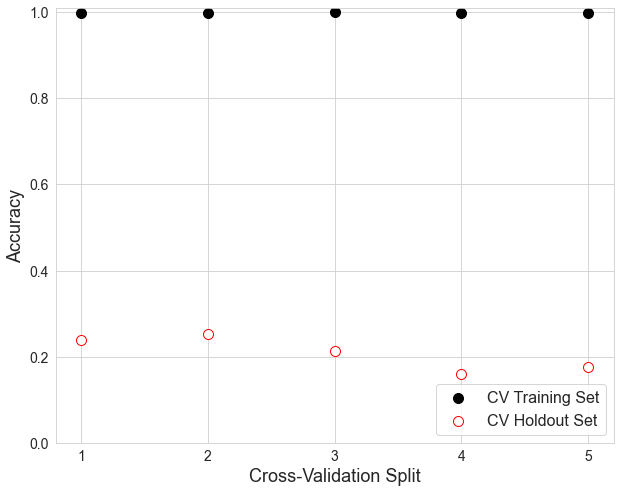

In [11]:
plt.figure(figsize=(10,8))

plt.scatter(range(1,6), train_accs, s=100, c='k', label='CV Training Set')
plt.scatter(range(1,6), holdout_accs, s=100, c='white', edgecolor='red', label='CV Holdout Set')

plt.xlabel("Cross-Validation Split", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.ylim(.00,1.01)

plt.legend(loc=4,fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(range(1,6),fontsize=14)

plt.show()

Let's try adjusting the depth of the trees to see if that helps the model.

## Adjusting the depth of the model.

In [12]:
depths = range(1,9)

tree_acc = np.zeros((5, len(depths)))


i = 0
for train_index, test_index in kfold.split(coffee_train[predictors], coffee_train.Country_of_Origin):
    X_tt = coffee_train[predictors].iloc[train_index,:]
    y_tt = coffee_train.Country_of_Origin.iloc[train_index]
    X_ho = coffee_train[predictors].iloc[test_index,:]
    y_ho = coffee_train.Country_of_Origin.iloc[test_index]
    
    j = 0
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=47)
        tree.fit(X_tt.values, y_tt)

        pred = tree.predict(X_ho.values)

        tree_acc[i,j] = accuracy_score(y_ho, pred)        
        
        j = j + 1
    i = i + 1

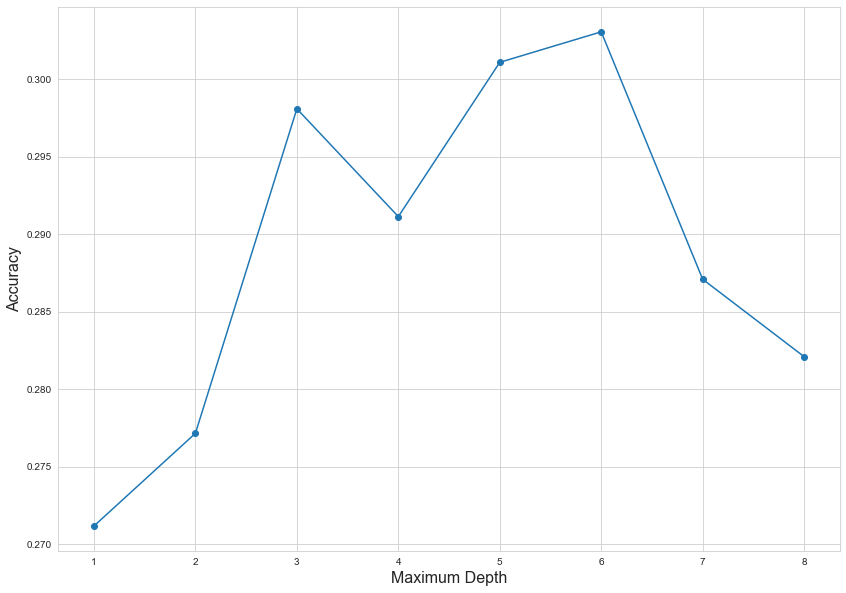

In [13]:
plt.figure(figsize=(14,10))

plt.plot(depths, np.mean(tree_acc, axis=0), '-o')
plt.ylabel("Accuracy", fontsize=16)

plt.xlabel("Maximum Depth", fontsize=16)

plt.show()


So varying the depth does help the model out, but not enough to get a decent accuracy.